In [1]:
import numpy as np
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Что добавлено/изменено:**
* класс Individ теперь инициализируется с помощью vectors, везде дальше его инициализация исправлена
* добавлена функция get_groups, считающая по вектору распределение по группам
* добавила функцию get_candidates, которая позволяет глобально кандидатов выводить и считать вне функций
* greedy_addition - добавление одного вектора в конец жадно
* greedy_fill - жадное добавление до конца начиная с элемента start
* результаты оптимизации шокируют: чем раньше начинаем жадно заполнять - тем лучше

# Исходные данные: 

In [9]:
from init_data import FlyData

In [10]:
imp = FlyData("/Users/ivankusenko/Downloads/ÐÑÑÐ¾Ð´Ð½ÑÐµ Ð´Ð°Ð½Ð½ÑÐµ 2/ID.xls")

In [74]:
imp.weight.values

array([[0.05982906, 0.05982906, 0.05982906, 0.04273504, 0.04273504,
        0.04273504, 0.02136752, 0.02136752, 0.02136752, 0.00854701,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
        0.01282051, 0.00213675, 0.00213675, 0.0042735 , 0.0042735 ,
        0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
        0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
        0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
        0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
        0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
        0.0042735 , 0.0042735 , 0.0042735 , 0.00

In [11]:
vectors = imp.df_links

In [12]:
imp.ideal

,День месяца_1,День месяца_10,День месяца_11,День месяца_12,День месяца_13,День месяца_14,День месяца_15,День месяца_16,День месяца_17,День месяца_18,...,Ночной полет,Время полета_ВВЛ,Время полета_МВЛ,Время полета_СНГ,Время полета(Ночной)_ВВЛ,Время полета(Ночной)_МВЛ,Время полета(Ночной)_СНГ,Экипаж_ВВЛ,Экипаж_МВЛ,Экипаж_СНГ
0,11.0,11.5,11.166667,11.666667,11.666667,12.166667,11.0,11.333333,11.5,11.166667,...,96.333333,4106.145975,2014.032483,641.908674,813.965239,1009.977568,41.650721,791.680293,304.451896,76.359654
1,11.0,11.5,11.166667,11.666667,11.666667,12.166667,11.0,11.333333,11.5,11.166667,...,96.333333,4017.834727,1970.687440,628.126812,796.459216,988.241314,40.756474,774.653554,297.899628,74.720203
2,11.0,11.5,11.166667,11.666667,11.666667,12.166667,11.0,11.333333,11.5,11.166667,...,96.333333,4251.041838,2084.930190,664.527762,842.688084,1045.530665,43.118377,819.616757,315.169171,79.050358
3,11.0,11.5,11.166667,11.666667,11.666667,12.166667,11.0,11.333333,11.5,11.166667,...,96.333333,4162.403511,2041.417142,650.640694,825.117224,1023.710162,42.217304,802.526956,308.591507,77.398391
4,11.0,11.5,11.166667,11.666667,11.666667,12.166667,11.0,11.333333,11.5,11.166667,...,96.333333,4033.534504,1978.415626,630.546528,799.571398,992.116770,40.913479,777.680530,299.067862,75.008045
5,11.0,11.5,11.166667,11.666667,11.666667,12.166667,11.0,11.333333,11.5,11.166667,...,96.333333,4272.956111,2095.850453,667.999529,847.032172,1051.006853,43.343645,823.841911,316.819937,79.463349


In [13]:
vectors = np.array(imp.df_links[list(imp.ideal.columns)])

In [7]:
# множество векторов
# vectors = vectors.drop(list(set(imp.df_links.columns) - set(imp.ideal.columns)), axis = 1)
# vectors.shape

(2135, 94)

In [8]:
# vectors.drop(list(set(imp.df_links.columns) - set(imp.ideal.columns)), axis = 1)

KeyError: "['Время полета в часах', 'Тип связи_СНГ', 'Тип связи_ВВЛ', 'Тип связи_МВЛ'] not found in axis"

In [31]:
np.array(vectors)

array([[1, 0, 0, ..., 4, 0, 0],
       [1, 0, 0, ..., 0, 4, 0],
       [1, 0, 0, ..., 3, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 3, 0, 0]], dtype=object)

In [8]:
imp.ideal.shape

(6, 94)

In [14]:
m = imp.ideal.shape[-1] #размерность
print(m)
k = imp.ideal.shape[0] #количество групп
print(k)
n = imp.df_links.shape[0] #количество векторов
print(n)
weights = np.array(imp.weight)[0] # веса для цф
print(len(weights))

94
6
2135
94


In [15]:
# идеальный вектор
ideal_vector = np.array(imp.ideal)
ideal_vector.shape

(6, 94)

In [11]:
# vectors = np.array(vectors)
# vectors.shape

(2135, 94)

# 1. Генетический алгоритм

### 1.0. Параметры

In [16]:
p = 100 # количество особей в популяции
print(p)
r = 10 # параметр для кроссовера
mu = 0.1 # параметр для мутации
p_trans = 2*p # количество особей в промежуточной популяции
cross_part = 0.85 # доля нового поколения, порожденная кроссовером
nparents = int(p_trans * cross_part)

100


### 1.1. Representation and Initial population

Одна особь в популяции описывается вектором распределения размерности $n$. Координата $i$ этого вектора указывает на номер группы, в которую распределен $i$- ый вектор.

Авторы предлагают два метода: случайную и частично случайную генерацию. Пока остановимся на случайной:

In [17]:
individual = np.random.randint(0, k, n) # особь
individual

array([1, 5, 3, ..., 1, 4, 1])

### 1.2. The fitness value

В нашем случае это целевая функция. Считаем ее так: в каждой группе векторы складываются, а затем по каждой координате расчитывается квадрат отклонения значения этой координаты от соответствующей координаты идеального вектора. Целевая функция - это взвешенная сумма таких квадратов. 

In [275]:
# # по индивиду вычисляем группы

# #--------------изменила немного способ задания groups, чтобы не было лишнего внутреннего списка------------------------------
# groups = np.array([[vectors[i] for i in range(len(vectors)) if individual[i] == group] for group in range(k)])
# groups = np.array(groups[0])


# #теперь считаем фитнес
# of = 0
# for group in groups:
#     s = sum(group)
#     of += sum((s * weights)**2)
# of    

In [18]:
#По списку всех векторов и вектору распределений по группам, получим списки групп
def get_groups(vectors, individual):
    num_vect = len(vectors)
    groups = [[vectors[i] for i in range(num_vect) if individual[i] == group] for group in range(k)]
    return np.array(groups)

In [15]:
weights

array([0.05982906, 0.05982906, 0.05982906, 0.04273504, 0.04273504,
       0.04273504, 0.02136752, 0.02136752, 0.02136752, 0.00854701,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01282051,
       0.01282051, 0.00213675, 0.00213675, 0.0042735 , 0.0042735 ,
       0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
       0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
       0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
       0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
       0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 ,
       0.0042735 , 0.0042735 , 0.0042735 , 0.0042735 , 0.00427

In [19]:
# оформим как класс
class Individ:
    def __init__(self, value, vectors):
        self.value = value
        self.vectors = vectors
    def fitness(self):
        groups = get_groups(self.vectors, self.value)
        #groups = np.array([[self.vectors[i] for i in range(len(self.vectors)) if self.value[i] == group] for group in range(k)])
        of = 0
        i = 0
        for group in groups:
            s = sum(group)
            of += sum(weights * ((1 - s/ideal_vector[i]) ** 2))
            i += 1
        return of

In [20]:
groups = get_groups(vectors, individual)

In [21]:
ind = Individ(individual, vectors)
ind.fitness()

0.6172353509455709

### 1.2.1 Initial solution

Предполагается, вектора 0,...,el-1 из vectors уже поставлены на места, значит определяем группу для вектора el. Так как построение групп не учитывает элементы после el+1, то такое построение корректно

In [22]:
#Жадно добавляет элемент в конец уже выбранным векторам
def greedy_addition(individual, vectors, el):
    min_fv = float('inf')
    for group in range(k):
        individual[el] = group
        fv = Individ(individual, vectors[:el + 1]).fitness()
        if fv < min_fv:
            min_fv = fv
            group_number = group
    return individual

In [23]:
#Жадно заполняет вектор до конца начиная с элемента start
def greedy_fill(individual, vectors, start):
    for el in range(start, n):
        individual = greedy_addition(individual, vectors, el)
    return individual

In [24]:
# строим начальную популяцию
def get_initial_population(start):
    population_values = np.random.randint(0, k, (p,n))
    population = list(map(lambda x: Individ(greedy_fill(x, vectors, start), vectors), population_values))
    return population

In [25]:
population = get_initial_population(n)

In [67]:
population_values

array([[4, 4, 0, ..., 1, 4, 5],
       [2, 2, 5, ..., 4, 1, 5],
       [5, 2, 1, ..., 5, 3, 5],
       ...,
       [3, 2, 3, ..., 5, 0, 0],
       [0, 2, 1, ..., 0, 3, 3],
       [3, 3, 3, ..., 4, 5, 4]])

В среднем действительно улучшает жизнь, но считает долго! поэтому стартовое значение можно выбирать исходя из ограничений по времени, но чем раньше начинаем, тем лучше

### 1.3. Genetic operators

- Кроссовер - скрещиваются два индивида. Выбираются $r$ случайных индивидов из популяции и генерируется случайная величина $\nu$ из распределения Бернулли. Если $\nu$ равно 1, то из выбранных индивидов берется случайный. Иначе берется лучший. Так выбирается первый родитель. Второй выбирается аналогично. Далее выбирается случайное число $y$ от 0 до $m$. Делим двух индивидов на две части по координате $y$, далее индивиды меняются сформированными частями. 

In [26]:
population[2].fitness()

0.5410704500322052

In [27]:
def get_candidates():
    candidates_index = np.random.choice(range(len(population)), r)
    candidates = itemgetter(*candidates_index)(population)
    return candidates

In [28]:
def choose_parent():
    # выбираем кандидатов
    #----candidates_index = np.random.choice(range(len(population)), r)
    #----candidates = itemgetter(*candidates_index)(population)
    
    candidates = get_candidates()
    
    # бросаем монетку
    nu = np.random.randint(0,2)
    if nu == 1: # если единица, то случайный 
        p = candidates[np.random.randint(0,r)]
    else: # иначе лучший
        p = max(candidates, key = lambda i: i.fitness())
    return p

In [29]:
def crossover(p1, p2):
    y = np.random.randint(0, m)
    ch1 = Individ(np.concatenate((p1.value[:y], p2.value[y:]), axis=0), vectors)
    ch2 = Individ(np.concatenate((p2.value[:y], p1.value[y:]), axis=0), vectors)    
    return ch1, ch2

In [30]:
p1, p2 = choose_parent(), choose_parent()
ch1, ch2 = crossover(p1, p2)

- Мутация - применяется к одному индивиду. В каждой координате индивида изменение происходит с вероятностью $p$. Изменение представляет собой смену значения $i \in \{0,...,k\}$ на значение $j \in \{0,...,k\}$.

In [31]:
def mutation(ind):
    val = ind.value
    for i in range(len(val)):
        nu = np.random.random()
        if nu <= mu:
            new_c = np.random.randint(0, k)
            val[i] = new_c    
    return Individ(val, vectors)       

In [32]:
candidates = get_candidates()
ind = candidates[np.random.randint(0,r)]
print(ind.value)
new_ind = mutation(ind)
print(new_ind.value)

[5 5 5 ... 4 2 5]
[5 5 5 ... 4 2 5]


### 1.4. New generation

cross_part - часть новой популяции, которая генерируется с помощью кроссовера. Остальная часть появляется с помощью мутаций. 

In [33]:
# дана популяция
population_values = np.random.randint(0, k, (p,n))
population = [Individ(val, vectors) for val in population_values]

In [34]:
def generate_population(population):    
    new_population = []

    for _ in range(nparents//2):
        p1, p2 = choose_parent(), choose_parent()
        ch1, ch2 = crossover(p1, p2)
        new_population.append(ch1)
        new_population.append(ch2)

    for _ in range(int(p_trans - len(new_population))):
        ind = candidates[np.random.randint(0,r)]
        new_ind = mutation(ind)
        new_population.append(new_ind)   
        
    return new_population    

In [35]:
new_population = generate_population(population)
len(new_population)

200

### 1.5. Selection

Из промежуточного поколения отбираются $p$ лучших особей для последующего улучшения и генерации следующих поколений.

In [36]:
# new_population = generate_population(population)
population = sorted(new_population, key = lambda i: i.fitness() )[:p]
len(population)

100

### 1.6. Local improvement procedure

После каждого отбора для каждого индивида запускается локальная оптимизация. Она бывает трех видов: 

- 1-change : из индивида выбирается случайная позиция и значение по этой позиции меняется на другое (случайно выбранное). Если это улучшает фитнесс, изменение принимается

- 2-change : из индивида выбираются две случайные позиции и значения на этих позициях меняются местами. Если это улучшает фитнесс, изменение принимается

- 3-change : из индивида выбираются три случайные позиции и значения на этих позициях меняются местами (сдвигаются циклически). Если это улучшает фитнесс, изменение принимается

Все три процесса применяются один за другим к каждому индивиду в популяции. 

In [37]:
def one_change(ind):
    
    # выбираем случайную позицию
    val = ind.value
    pos = np.random.randint(0, n)
    old_group = val[pos]
    
    # выбираем новую группу
    a = list(range(k))
    a.remove(old_group)
    new_group = np.random.choice(a)
    
    # формируем нового индивида
    new_val = val.copy()
    new_val[pos] = new_group
    new_ind = Individ(new_val, vectors)
    
    # сравниваем цф
    if new_ind.fitness() < ind.fitness():
        return new_ind
    else: return ind

In [38]:
old = population[1]
new = one_change(old)
print(old.fitness())
print(new.fitness())

0.5100841827887548
0.5093049882895847


In [39]:
def two_change(ind):
    
    # выбираем две случайные позиции
    val = ind.value
    pos1, pos2 = np.random.randint(0, n, 2)
    g1, g2 = val[pos1], val[pos2]
    
    # формируем нового индивида
    new_val = val.copy()
    new_val[pos1] = g2
    new_val[pos2] = g1
    new_ind = Individ(new_val, vectors)
    
    # сравниваем цф
    if new_ind.fitness() < ind.fitness():
        return new_ind
    else: return ind

In [40]:
old = population[2]
new = one_change(old)
print(old.fitness())
print(new.fitness())

0.5275073473516263
0.5275073473516263


In [41]:
def three_change(ind):
    
    # выбираем три случайные позиции
    val = ind.value
    pos1, pos2, pos3 = np.random.randint(0, n, 3)
    g1, g2, g3 = val[pos1], val[pos2], val[pos3] 
    
    # формируем нового индивида
    new_val = val.copy()
    new_val[pos1] = g2
    new_val[pos2] = g3
    new_val[pos3] = g1
    new_ind = Individ(new_val, vectors)
    
    # сравниваем цф
    if new_ind.fitness() < ind.fitness():
        return new_ind
    else: 
        return ind

In [42]:
old = population[3]
new = one_change(old)
print(old.fitness())
print(new.fitness())

0.5283094876637837
0.5283094876637837


In [43]:
# все вместе
def local_search(ind):
    ind = one_change(ind)
    ind = two_change(ind)
    ind = three_change(ind)
    return ind

In [44]:
old = population[3]
new = local_search(old)
print(old.fitness())
print(new.fitness())

0.5283094876637837
0.5283094876637837


### 1.7. Go

In [45]:
iter_n = 10 # количество итераций алгоритма

# начальная популяция генерируется с помощью случайной генерации + жадного алгоритма
before = datetime.datetime.now()
population = get_initial_population(n-10)
after = datetime.datetime.now()  

print(f'На жадный алгоритм ушло {(after - before).seconds} секунд')

best = max(population, key = lambda i: i.fitness() )
fitness_vals = [best.fitness()]

before = datetime.datetime.now()

for _ in range(iter_n):
    # генерируем новую популяцию
    new_population = generate_population(population)
    population = sorted(new_population, key = lambda i: i.fitness() )[:p]
    
    #улучшаем новую популяцию
    population = [local_search(ind) for ind in population]
    
    # давайте на каждом шаге смотреть, какой будет фитнес у лучшего представителя
    best = max(population, key = lambda i: i.fitness())
    best_f = best.fitness()
    
    #критерий останова
    if abs(best_f - fitness_vals[-1]) < 10**(-5):
        break
    else:
        fitness_vals.append(best_f)
        
after = datetime.datetime.now()         
    
print(f'На генетический алгоритм ушло {(after - before).seconds} секунд')
print(f'Всего {len(fitness_vals)} итераций')

На жадный алгоритм ушло 39 секунд
На генетический алгоритм ушло 115 секунд
Всего 11 итераций


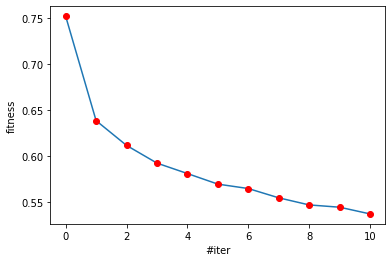

In [46]:
plt.plot(range(len(fitness_vals)), fitness_vals)
plt.plot(range(len(fitness_vals)), fitness_vals, 'ro')
plt.ylabel('fitness')
plt.xlabel('#iter')
plt.show()

In [58]:
best.value

array([1, 0, 1, ..., 2, 2, 1])

In [66]:
np.random.randint(0, 1, size = (p,n)).max()

0